In [25]:
#random forest

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

df = pd.read_csv("C:\\Users\\lclai\\Desktop\\transcripts_cleaned.csv")
df = df[(df['label'] == 0) | (df['label'] == 1)] #here we can include more categories

df["sex"] = df["sex"].map({"M": 0, "F": 1})  
X_numeric = df[["age", "sex"]].values  

vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df["clean_transcripts"]).toarray()

X = np.hstack((X_numeric, X_text))
y = LabelEncoder().fit_transform(df["label"])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {auc:.2f}")


Confusion Matrix:
[[38  2]
 [13 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        40
           1       0.96      0.78      0.86        60

    accuracy                           0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.85      0.85       100

AUC-ROC Score: 0.95


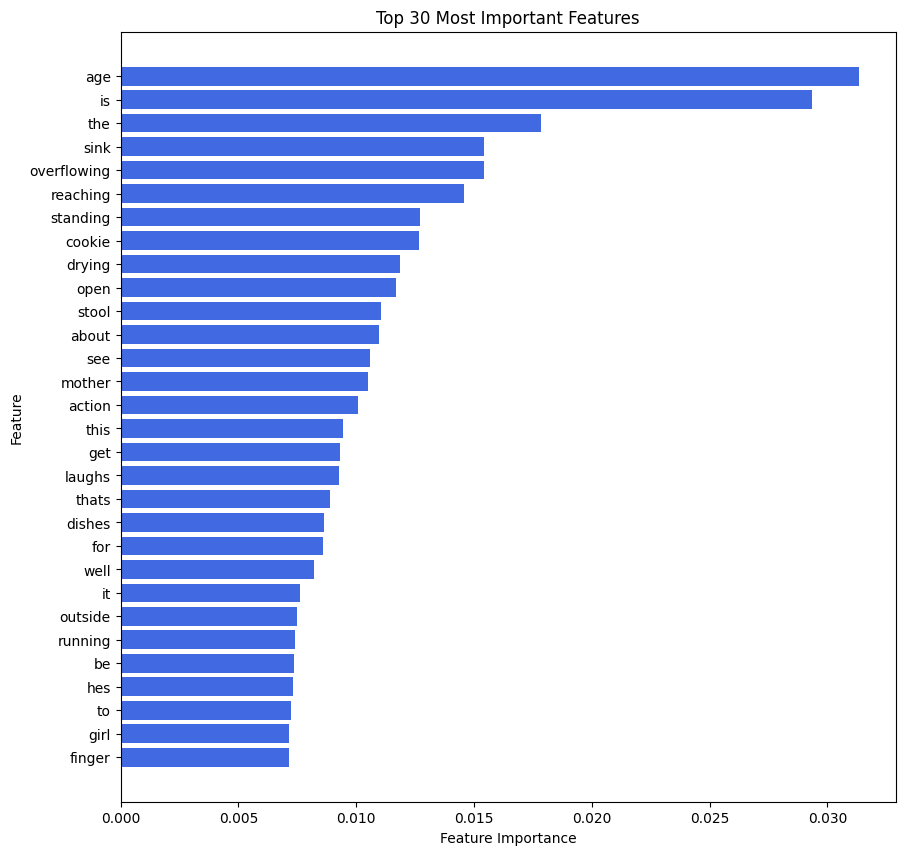

In [27]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_

feature_names = ["age", "sex"] + vectorizer.get_feature_names_out().tolist()

sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

plt.figure(figsize=(10, 10))
plt.barh(sorted_features[:30], sorted_importances[:30], color='royalblue')  
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 30 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

In [28]:
import pandas as pd

feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_text, columns=feature_names)
print(df_tfidf)  


     a_little  a_lot  a_lot_of   ab     about  above  absentmindedly   ac  \
0         0.0    0.0       0.0  0.0  0.093024    0.0        0.000000  0.0   
1         0.0    0.0       0.0  0.0  0.000000    0.0        0.000000  0.0   
2         0.0    0.0       0.0  0.0  0.047324    0.0        0.000000  0.0   
3         0.0    0.0       0.0  0.0  0.037464    0.0        0.000000  0.0   
4         0.0    0.0       0.0  0.0  0.000000    0.0        0.000000  0.0   
..        ...    ...       ...  ...       ...    ...             ...  ...   
491       0.0    0.0       0.0  0.0  0.000000    0.0        0.000000  0.0   
492       0.0    0.0       0.0  0.0  0.000000    0.0        0.000000  0.0   
493       0.0    0.0       0.0  0.0  0.000000    0.0        0.222074  0.0   
494       0.0    0.0       0.0  0.0  0.000000    0.0        0.000000  0.0   
495       0.0    0.0       0.0  0.0  0.000000    0.0        0.000000  0.0   

     accept  accident  ...  you_know  youd  youll     young  younger  \
0  

AUC: 0.8019323671497585


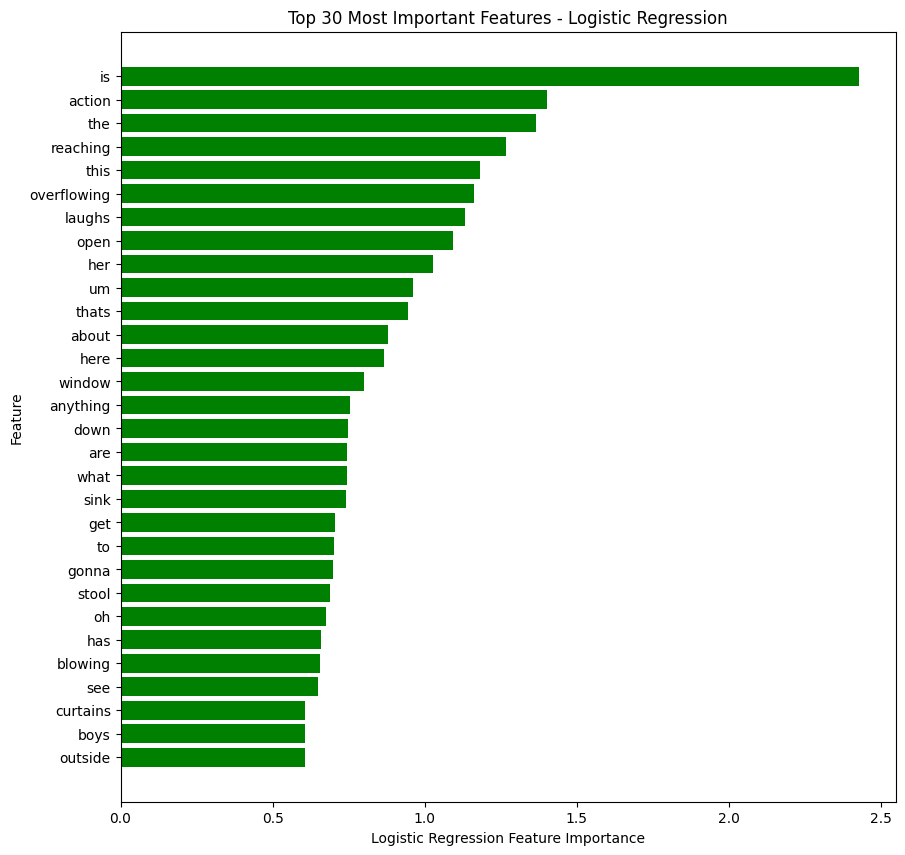

In [13]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_test)
auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"AUC: {auc_lr}")

log_reg_importances = np.abs(lr_clf.coef_[0])
sorted_idx_lr = np.argsort(log_reg_importances)[::-1]
sorted_features_lr = [feature_names[i] for i in sorted_idx_lr]
sorted_importances_lr = log_reg_importances[sorted_idx_lr]

plt.figure(figsize=(10, 10))
plt.barh(sorted_features_lr[:30], sorted_importances_lr[:30], color='green')
plt.xlabel("Logistic Regression Feature Importance")
plt.ylabel("Feature")
plt.title("Top 30 Most Important Features - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


### con clases del 0 al 5

0 : control
1 : alzheimer
2 : MCI
3 : memory
4 : vascular
5 : other

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

df = pd.read_csv("C:\\Users\\lclai\\Desktop\\transcripts_cleaned.csv")

df["sex"] = df["sex"].map({"M": 0, "F": 1})  
X_numeric = df[["age", "sex"]].values  

vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df["clean_transcripts"]).toarray()

X = np.hstack((X_numeric, X_text))

y = LabelEncoder().fit_transform(df["label"])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7727


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[42  6  0  0  0  0]
 [10 43  0  0  0  0]
 [ 4  2  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 1  0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        48
           1       0.83      0.81      0.82        53
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.77       110
   macro avg       0.26      0.28      0.27       110
weighted avg       0.71      0.77      0.74       110



c:\Users\lclai\Desktop\NLP-for-dementia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lclai\Desktop\NLP-for-dementia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lclai\Desktop\NLP-for-dementia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import numpy as np

df = pd.read_csv("C:\\Users\\lclai\\Desktop\\transcripts_cleaned.csv")
df = df[(df['label'] == 0) | (df['label'] == 1)]  # Filtrar categorías deseadas

df["sex"] = df["sex"].map({"M": 0, "F": 1})  
X_numeric = df[["age", "sex"]].values  

vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df["clean_transcripts"]).toarray()

X = np.hstack((X_numeric, X_text))
y = LabelEncoder().fit_transform(df["label"])  

clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)

best_clf = grid_search.best_estimator_
y_pred_proba = best_clf.predict_proba(X)[:, 1]
auc_score = roc_auc_score(y, y_pred_proba)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")
print(f"AUC score on full dataset: {auc_score:.4f}")
# triga 52 minuts

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 500}
Best cross-validation AUC: 0.9190
AUC score on full dataset: 0.9998


In [36]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Mean cross-validation AUC: {grid_search.best_score_:.4f}")

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 500}
Mean cross-validation AUC: 0.9190
